In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Logistic Regression

In [3]:
titanic = pd.read_csv ('titanic_train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


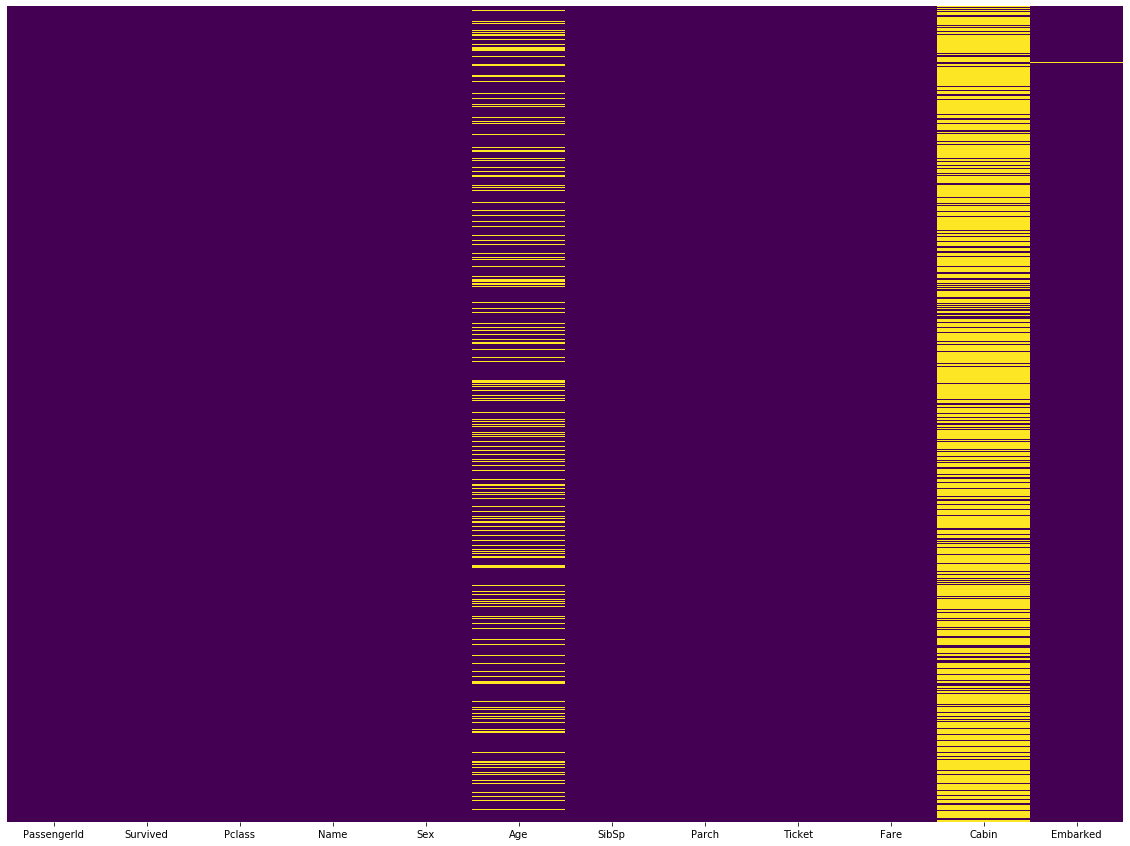

In [6]:
from matplotlib.pyplot import figure
figure (figsize = (20,15))
sns.heatmap(titanic.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [7]:
titnew = []

for i in titanic.columns :
    titnew.append ([i, titanic[i].isna().sum(), round(((titanic[i].isna().sum()/len(titanic))*100),2), titanic[i].nunique()])

In [8]:
pd.DataFrame(titnew, columns = ['Feature Names', 'Jumlah Missing Value', '% Missing Value', 'Unique'])

,Feature Names,Jumlah Missing Value,% Missing Value,Unique
0,PassengerId,0,0.00,891
1,Survived,0,0.00,2
2,Pclass,0,0.00,3
3,Name,0,0.00,891
4,Sex,0,0.00,2
5,Age,177,19.87,88
6,SibSp,0,0.00,7
7,Parch,0,0.00,7
8,Ticket,0,0.00,681
9,Fare,0,0.00,248


In [9]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
def isidata(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [11]:
titanic['Age'] = titanic[['Age','Pclass']].apply(isidata,axis=1)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
pd.DataFrame(titnew, columns = ['Feature Names', 'Jumlah Missing Value', '% Missing Value', 'Unique'])

,Feature Names,Jumlah Missing Value,% Missing Value,Unique
0,PassengerId,0,0.00,891
1,Survived,0,0.00,2
2,Pclass,0,0.00,3
3,Name,0,0.00,891
4,Sex,0,0.00,2
5,Age,177,19.87,88
6,SibSp,0,0.00,7
7,Parch,0,0.00,7
8,Ticket,0,0.00,681
9,Fare,0,0.00,248


In [14]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [15]:
pd.DataFrame(titnew, columns = ['Feature Names', 'Jumlah Missing Value', '% Missing Value', 'Unique'])

,Feature Names,Jumlah Missing Value,% Missing Value,Unique
0,PassengerId,0,0.00,891
1,Survived,0,0.00,2
2,Pclass,0,0.00,3
3,Name,0,0.00,891
4,Sex,0,0.00,2
5,Age,177,19.87,88
6,SibSp,0,0.00,7
7,Parch,0,0.00,7
8,Ticket,0,0.00,681
9,Fare,0,0.00,248


In [16]:
pd.DataFrame(titnew, columns = ['Feature Names', 'Jumlah Missing Value', '% Missing Value', 'Unique'])

,Feature Names,Jumlah Missing Value,% Missing Value,Unique
0,PassengerId,0,0.00,891
1,Survived,0,0.00,2
2,Pclass,0,0.00,3
3,Name,0,0.00,891
4,Sex,0,0.00,2
5,Age,177,19.87,88
6,SibSp,0,0.00,7
7,Parch,0,0.00,7
8,Ticket,0,0.00,681
9,Fare,0,0.00,248


In [17]:
titanic.dropna(inplace = True)

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
titanic = pd.get_dummies (data = titanic, drop_first = True, columns = ['Pclass', 'Sex', 'SibSp', 'Embarked'])

In [21]:
titanic.head()

,PassengerId,Survived,Name,Age,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,0,A/5 21171,7.2500,0,1,1,1,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0,PC 17599,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0,113803,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,373450,8.0500,0,1,1,0,0,0,0,0,0,0,1


In [22]:
titanic.drop (['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [23]:
titanic.head()

,Survived,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split (titanic[['Age','Parch','Fare','Pclass_2','Pclass_3','Sex_male','SibSp_1',
                                                             'SibSp_2','SibSp_3','SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_Q',
                                                             'Embarked_S']], titanic['Survived'], test_size = 0.30, random_state = 101)

In [26]:
X_train.head()

,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
807,18.0,0,7.775,0,1,0,0,0,0,0,0,0,0,1
651,18.0,1,23.000,1,0,0,0,0,0,0,0,0,0,1
2,26.0,0,7.925,0,1,0,0,0,0,0,0,0,0,1
690,31.0,0,57.000,0,0,1,1,0,0,0,0,0,0,1
196,25.0,0,7.750,0,1,1,0,0,0,0,0,0,1,0


In [27]:
X_test.head()

,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
511,25.0,0,8.05,0,1,1,0,0,0,0,0,0,0,1
613,25.0,0,7.75,0,1,1,0,0,0,0,0,0,1,0
615,24.0,2,65.00,1,0,0,1,0,0,0,0,0,0,1
337,41.0,0,134.50,0,0,0,0,0,0,0,0,0,0,0
718,25.0,0,15.50,0,1,1,0,0,0,0,0,0,1,0


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logisticmodel = LogisticRegression()
logisticmodel.fit (X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predeksi = logisticmodel.predict(X_test)

In [31]:
predeksi

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [32]:
banding = []
for i, j in zip (predeksi, Y_test) :
    banding.append ([i,j])

databanding = pd.DataFrame (banding, columns = ['Prediksi', 'Nilai Asli'])
databanding

,Prediksi,Nilai Asli
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
262,0,0
263,0,1
264,0,0
265,1,1


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
CM = pd.DataFrame (confusion_matrix(Y_test, predeksi), columns = ['Prediksi Not Survive', 'Prediksi Survive'], 
                  index = ['Actual Not Survive', 'Actual Survive'])

In [35]:
CM

,Prediksi Not Survive,Prediksi Survive
Actual Not Survive,149,14
Actual Survive,35,69


In [36]:
((150+68)/(150+13+36+68))*100

81.64794007490637

In [37]:
(accuracy_score(Y_test, predeksi))*100

81.64794007490637